# Ames数据预处理

## 导入必要的工具包

In [1]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

# 查看数据分布是否对称/计算斜度
from scipy.stats import skew

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
# 自定义
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## 读入数据
将训练数据和测试数据一起读入

In [2]:
# 读入训练集数据
train = pd.read_csv("/Users/qi/PycharmProjects/HousePrices/Ames_House_train.csv")
# 通过观察前5行，了解每列（特征）的概况
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
# 查看样本个数和特征数
print("train: " + str(train.shape))
# 查看特征值类型
train.info()
# 查看哪些特征值有缺失
train.columns[train.isnull().sum()>0]

train: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [4]:
# 读入测试集数据
test = pd.read_csv("/Users/qi/PycharmProjects/HousePrices/Ames_House_test.csv")

## 数据探索

In [5]:
# 对数值型特征，用常用统计量观察其分布
train.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000    ...        1460.000   
mean    1971.268      1984.866     103.685     443.640    ...          94.245   
std       30.203        20.645     181.066     456.098    ...         125.339   
min     1872.000      1950.000       0.000       0.000    ...           0.000   
25%     1954.000      1967.000       0.000       0.000    ...           0.000   
50%     1973.000      1994.000       0.000     383.500    ...           0.000   
75%     2000.000      2004.000     166.000     712.250    ...         168.000   
max     2010.000      2010.000    1600.000    5644.000    ...         857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [6]:
# 对类别型特征，观察其取值范围及直方图
categorical_features = train.select_dtypes(include=['object']).columns
for col in categorical_features:
    print('\n%s 属性的不同取值和出现的次数：' %col)
    print(train[col].value_counts())


MSZoning 属性的不同取值和出现的次数：
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street 属性的不同取值和出现的次数：
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley 属性的不同取值和出现的次数：
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape 属性的不同取值和出现的次数：
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour 属性的不同取值和出现的次数：
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities 属性的不同取值和出现的次数：
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig 属性的不同取值和出现的次数：
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope 属性的不同取值和出现的次数：
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood 属性的不同取值和出现的次数：
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfo

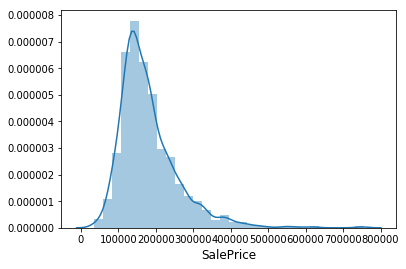

In [7]:
# 目标y（房屋价格）的直方图/分布
fig = plt.figure()
sns.distplot(train.SalePrice.values, bins=30, kde=True)
plt.xlabel('SalePrice', fontsize=12)
plt.show()

y分布类似高斯分布，但是右skew的，可以取对数log后更接近高斯分布。

In [8]:
# 斜度
skew(train.SalePrice.values)

1.880940746034036

In [9]:
# 取对数后斜度明显减小
skew(np.log10(train.SalePrice.values))

0.12121036730137275

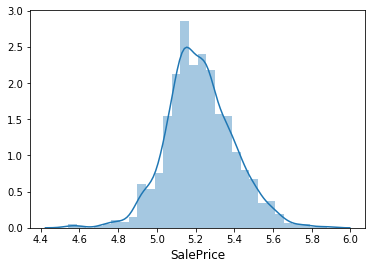

In [10]:
# 取对数后更接近高斯分布
fig = plt.figure()
sns.distplot(np.log10(train.SalePrice.values), bins=30, kde=True)
plt.xlabel('SalePrice', fontsize=12)
plt.show()

## 特征工程

In [11]:
# 去掉无关列‘Id’
train.drop(['Id'], inplace=True, axis=1)
test_id = test['Id']
test.drop(['Id'], inplace=True, axis=1)

### 离群点检测

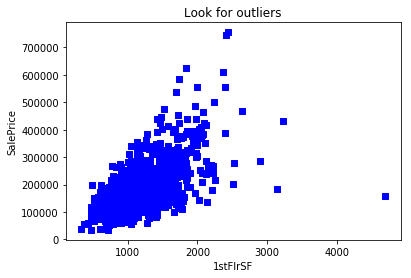

In [12]:
# 离群点（Outliers）检测
plt.scatter(train['1stFlrSF'], train.SalePrice, c="blue", marker="s")
plt.title('Look for outliers')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

可以看到有一个极端的离群点在图的右下角（面积很大，但价格很低）

In [13]:
# 剔除离群点
train = train[train['1stFlrSF'] < 4000]
temp = train.reindex()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1200 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            91 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-

剔除了1个样本点

## 缺失值处理

In [15]:
# 有些特征，用中值\均值\众数填充没有意义
# 因为特征工程对训练集和测试集都需要进行，因此我们定义成函数，将数据集以参数形式传递
def process_missvalue_by_meaning(df):
    # LotFrontage: 房屋到街道直线距离，填充为0
    df.loc[:, 'LotFrontage'] = df.loc[:, 'LotFrontage'].fillna(0)
    
    # Alley: 所在巷通道的类型, 填充为'None'
    df.loc[:, 'Alley'] = df.loc[:, 'Alley'].fillna('None')
    
    # LotShape: 房地产形状，填充为‘Reg’普通
    df.loc[:, 'LotShape'] = df.loc[:, 'LotShape'].fillna('Reg')
    
    # Utilities: 最有可能所有公共设施都可用，填充为'AllPub'
    df.loc[:, 'Utilities'] = df.loc[:, 'Utilities'].fillna('AllPub')
    
    # Condition: 靠近主干道或铁路, 填充为'Norm'
    df.loc[:, 'Condition1'] = df.loc[:, 'Condition1'].fillna('Norm')
    df.loc[:, 'Condition2'] = df.loc[:, 'Condition2'].fillna('Norm')
    
    
    # MasVnrType: NA意味着表层砌体类型没有砌体，类型设为0
    df.loc[:, 'MasVnrType'] = df.loc[:, 'MasVnrType'].fillna('None')
    df.loc[:, 'MasVnrArea'] = df.loc[:, 'MasVnrArea'].fillna(0)
    
    # ExterQual, ExterCond: 外部材料为平均水平, 填充为'TA'
    df.loc[:, 'ExterQual'] = df.loc[:, 'ExterQual'].fillna('TA')
    df.loc[:, 'ExterCond'] = df.loc[:, 'ExterCond'].fillna('TA')
    
    # BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtFullBath, BsmtHalfBath: 
    # NA意味着没有地下室, 字符串类型填充‘NO’， 数值类型填充0
    df.loc[:, 'BsmtQual'] = df.loc[:, 'BsmtQual'].fillna('No')
    df.loc[:, 'BsmtCond'] = df.loc[:, 'BsmtCond'].fillna('No')
    df.loc[:, 'BsmtExposure'] = df.loc[:, 'BsmtExposure'].fillna('No')
    df.loc[:, 'BsmtFinType1'] = df.loc[:, 'BsmtFinType1'].fillna('No')
    df.loc[:, 'BsmtFinSF1'] = df.loc[:, 'BsmtFinSF1'].fillna(0)
    df.loc[:, 'BsmtFinType2'] = df.loc[:, 'BsmtFinType2'].fillna('No')
    df.loc[:, 'BsmtFinSF2'] = df.loc[:, 'BsmtFinSF2'].fillna(0)
    df.loc[:, 'BsmtUnfSF'] = df.loc[:, 'BsmtUnfSF'].fillna(0)
    df.loc[:, 'BsmtFullBath'] = df.loc[:, 'BsmtFullBath'].fillna(0)
    df.loc[:, 'BsmtHalfBath'] = df.loc[:, 'BsmtHalfBath'].fillna(0)
    
    # HeatingQC: 取暖质量和条件, 用典型'TA'填充
    df.loc[:, 'HeatingQC'] = df.loc[:, 'HeatingQC'].fillna('TA')
    
    # CentralAir: NA意味着没有中央空调, 用'N'填充
    df.loc[:, 'CentralAir'] = df.loc[:, 'CentralAir'].fillna('N')
    
    # HalfBath: NA意味着地上半浴室数目为0
    df.loc[:, 'HalfBath'] = df.loc[:, 'HalfBath'].fillna(0)
    
    # BedroomAbvGr: NA意味着地下室之上的卧室数目为0
    df.loc[:, 'BedroomAbvGr'] = df.loc[:, 'BedroomAbvGr'].fillna(0)
    
    # KitchenAbvGr: NA意味着地下室之上厨房数目为0
    df.loc[:, 'KitchenAbvGr'] = df.loc[:, 'KitchenAbvGr'].fillna(0)

    # KitchenQual: NA意味着厨房质量可能为典型'typical'
    df.loc[:, 'KitchenQual'] = df.loc[:, 'KitchenQual'].fillna('TA')
    
    # TotRmsAbvGrd: NA意味着地下室之上房间总数可能为0
    df.loc[:, 'TotRmsAbvGrd'] = df.loc[:, 'TotRmsAbvGrd'].fillna(0)
    
    # Functional: 家庭功能评级, 填充为典型值'Typ'
    df.loc[:, 'Functional'] = df.loc[:, 'Functional'].fillna('Typ')
    
    # Fireplaces, FireplaceQu: 壁炉的数目, 壁炉质量, NA意味着没有壁炉, 填充0, 'NO'
    df.loc[:, 'Fireplaces'] = df.loc[:, 'Fireplaces'].fillna(0)
    df.loc[:, 'FireplaceQu'] = df.loc[:, 'FireplaceQu'].fillna('No')
    
    # GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond:
    # NA意味着没有车库
    df.loc[:, 'GarageType'] = df.loc[:, 'GarageType'].fillna('No')
    df.loc[:, 'GarageFinish'] = df.loc[:, 'GarageFinish'].fillna('No')
    df.loc[:, 'GarageCars'] = df.loc[:, 'GarageCars'].fillna(0)
    df.loc[:, 'GarageArea'] = df.loc[:, 'GarageArea'].fillna(0)
    df.loc[:, 'GarageQual'] = df.loc[:, 'GarageQual'].fillna('No')
    df.loc[:, 'GarageCond'] = df.loc[:, 'GarageCond'].fillna('No')
    
    # PavedDrive: NA意味着没有铺设的车道
    df.loc[:, 'PavedDrive'] = df.loc[:, 'PavedDrive'].fillna('N')
    
    # WoodDeckSF: NA意味着木头Deck面积为0
    df.loc[:, 'WoodDeckSF'] = df.loc[:, 'WoodDeckSF'].fillna(0)
    
    # OpenPorchSF: NA意味着开放门廊面积为0
    df.loc[:, 'OpenPorchSF'] = df.loc[:, 'OpenPorchSF'].fillna(0)
    
    # EnclosedPorch: NA意味着封闭门廊面积为0
    df.loc[:, 'EnclosedPorch'] = df.loc[:, 'EnclosedPorch'].fillna(0)
    
    # ScreenPorch: NA意味着观景门廊面积为0
    df.loc[:, 'ScreenPorch'] = df.loc[:, 'ScreenPorch'].fillna(0)
    
    # PoolArea, PoolQC: NA意味着没有游泳池, 填充为0, 'NO'
    df.loc[:, 'PoolArea'] = df.loc[:, 'PoolArea'].fillna(0)
    df.loc[:, 'PoolQC'] = df.loc[:, 'PoolQC'].fillna('No')
    
    # Fence: NA意味着没有围栏
    df.loc[:, 'Fence'] = df.loc[:, 'Fence'].fillna('No')
    
    # MiscFeature, MiscVal: NA意味着没有杂项功能
    df.loc[:, 'MiscFeature'] = df.loc[:, 'MiscFeature'].fillna('No')
    df.loc[:, 'MiscVal'] = df.loc[:, 'MiscVal'].fillna(0)
    
    # SaleCondition: NA意味着销售条件正常'Normal'
    df.loc[:, 'SaleCondition'] = df.loc[:, 'SaleCondition'].fillna('Normal')
    
    return df

train = process_missvalue_by_meaning(train)
test = process_missvalue_by_meaning(test)

In [16]:
# 有些特征用数值表示类别，需要转换成类别
# MSSubClass: 房地产建筑类别
# 
def numerical2cat(df):
    df.replace({'MSSubClass':{20:'SC20', 30:'SC30', 40:'SC40', 45:'SC45', 
                              50:'SC50', 60:'SC60', 70:'SC70', 75:'SC75', 
                              80:'SC80', 85:'SC85', 90:'SC90', 120:'SC120', 
                              150:'SC150', 160:'SC160', 180:'SC180', 190:'SC190'},
                'MoSold':{1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                          7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
               }, inplace=True)
    return df

train = numerical2cat(train)
test = numerical2cat(test)

In [17]:
# 有些类别型特征，可以编码成一列有序数字，把信息隐藏在序列里
def cat2numerical(df):
    df.replace({'Street':{'Grvl':1, 'Pave':2},
                'Alley':{'None':0, 'Grvl':1, 'Pave':2},
                'LotShape':{'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4},
                'Utilities':{'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4},
                'LandSlope':{'Sev':1, 'Mod':2, 'Gtl':3},
                'ExterQual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'ExterCond':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'BsmtQual':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'BsmtCond':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'BsmtExposure':{'No':0, 'Mn':1, 'Av':2, 'Gd':3},
                'BsmtFinType1':{'No':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'BsmtFinType2':{'No':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
                'HeatingQC':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'KitchenQual':{'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'Functional':{'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
                'FireplaceQu':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'GarageQual':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'GarageCond':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
                'PavedDrive':{'N':0, 'P':1, 'Y':2},
                'PoolQC':{'No':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4}
    }, inplace=True)
    
    return df

train = cat2numerical(train)
test = cat2numerical(test)

### 通过以下方式创造一些新特征
 1. 简化已有特征
 2. 联合已有特征
 3. 现有重要特征（top 10）的多项式

In [18]:
# 简化已有特征: 合并类别
def simplify(df):
    df['SimplOverallQual'] = df.OverallQual.replace({1:1, 2:1, 3:1, # bad
                                                     4:2, 5:2, 6:2, # average
                                                     7:3, 8:3, 9:3, 10:3 # good
                                                    }, inplace = True)
    df['SimplOverallCond'] = df.OverallCond.replace({1:1, 2:1, 3:1, # bad
                                                     4:2, 5:2, 6:2, # average
                                                     7:3, 8:3, 9:3, 10:3 # good
                                                    },inplace = True)
    df['SimplPoolQC'] = df.PoolQC.replace({1:1, 2:1, # average
                                           3:2, 4:2 # good
                                          },inplace = True)
    df['SimplGarageCond'] = df.GarageCond.replace({1:1, # bad
                                                   2:1, 3:1, # average
                                                   4:2, 5:2 # good
                                                  },inplace = True)
    df['SimplGarageQual'] = df.GarageQual.replace({1:1, # bad
                                                   2:1, 3:1, # average
                                                   4:2, 5:2 # good
                                                  },inplace = True)
    df['SimplFireplaceQu'] = df.FireplaceQu.replace({1:1, # bad
                                                     2:1, 3:1, # average
                                                     4:2, 5:2 # good
                                                    },inplace = True)
    df['SimplFireplaceQu'] = df.FireplaceQu.replace({1:1, # bad
                                                     2:1, 3:1, # average
                                                     4:2, 5:2 # good
                                                    },inplace = True)
    df['SimplFunctional'] = df.Functional.replace({1:1, 2:1, # bad
                                                   3:2, 4:2, # major
                                                   5:3, 6:3, 7:3, # minor
                                                   8:4 # typical
                                                  },inplace = True)
    df['SimplKitchenQual'] = df.KitchenQual.replace({1:1, # bad
                                                     2:1, 3:1, # average
                                                     4:2, 5:2 # good
                                                    },inplace = True)
    df['SimplHeatingQC'] = df.HeatingQC.replace({1:1, # bad
                                                 2:1, 3:1, # average
                                                 4:2, 5:2 # good
                                                },inplace = True)
    df['SimplBsmtFinType1'] = df.BsmtFinType1.replace({1:1, # unfinished
                                                       2:1, 3:1, # rec room
                                                       4:2, 5:2, 6:2 # living quarters
                                                      },inplace = True)
    df['SimplBsmtFinType2'] = df.BsmtFinType2.replace({1:1, # unfinished
                                                       2:1, 3:1, # rec room
                                                       4:2, 5:2, 6:2 # living quarters
                                                      },inplace = True)
    df['SimplBsmtCond'] = df.BsmtCond.replace({1:1, # bad
                                               2:1, 3:1, # average
                                               4:2, 5:2 # good
                                              },inplace = True)
    df['SimplBsmtQual'] = df.BsmtQual.replace({1:1, # bad
                                               2:1, 3:1, # average
                                               4:2, 5:2 # good
                                              },inplace = True)
    df['SimplExterCond'] = df.ExterCond.replace({1:1, # bad
                                                 2:1, 3:1, # average
                                                 4:2, 5:2 # good
                                                },inplace = True)
    df['SimplExterQual'] = df.ExterQual.replace({1:1, # bad
                                                 2:1, 3:1, # average
                                                 4:2, 5:2 # good
                                                },inplace = True)
    
    return df

train = simplify(train)
test = simplify(test)

In [19]:
# 合并已有特征
def Combine(df):
    # 房子总体质量等级 = 整体材质和完成品质 × 总体条件评级
    df['OverallGrade'] = df['OverallQual'] * df['OverallCond']
    # 车库总体质量等级 = 车库质量 × 车库条件
    df['GarageGrade'] = df['GarageQual'] * df['GarageCond']
    # 外墙总体质量等级 = 材料质量 × 现状
    df['ExterGrade'] = df['ExterQual'] * df['ExterCond']
    # 厨房得分 = 地上厨房数量 × 厨房质量
    df['KitchenScore'] = df['KitchenAbvGr'] * df['KitchenQual']
    # 壁炉总体得分 = 壁炉数量 × 壁炉质量
    df['FireplaceScore'] = df['Fireplaces'] * df['FireplaceQu']
    # 车库总体得分 = 车库面积 × 车库质量
    df['GarageScore'] = df['GarageArea'] * df['GarageQual']
    # 游泳池总体得分 = 游泳池面积 × 游泳池质量
    df['PoolScore'] = df['PoolArea'] * df['PoolQC']
    # 简化的房子总体质量等级 = 简化的总体质量 × 简化的总体现状
    df['SimplOverallGrade'] = df['SimplOverallQual'] * df['SimplOverallCond']
    # 简化的外墙总体质量 = 简化的外墙质量 × 简化的外墙现状
    df['SimplExterGrade'] = df['SimplExterQual'] * df['SimplExterCond']
    # 简化的游泳池总体得分 = 游泳池面积 × 简化的游泳池质量
    df['SimplPoolScore'] = df['PoolArea'] * df['SimplPoolQC']
    # 简化的车库总体得分 = 车库面积 × 简化的车库质量
    df['SimplGarageScore'] = df['GarageArea'] * df['SimplGarageQual']
    # 简化的壁炉总体得分 = 壁炉数量 × 简化的壁炉质量
    df['SimplFireplaceScore'] = df['Fireplaces'] * df['SimplFireplaceQu']
    # 简化的厨房总体得分 = 地上厨房数量 × 简化的厨房质量
    df['SimplKitchenScore'] = df['KitchenAbvGr'] * df['SimplKitchenQual']
    # 浴室总数 = 地下全浴室数目 + 0.5×地下半浴室数目 + 地上全浴室数目 + 0.5×地上半浴室数目
    df['TotalBath'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']) + \
    df['FullBath'] + (0.5 * df['HalfBath'])
    # 房子总面积 (包括地下室) = 地上居住面积 + 地下室总面积
    df['AllSF'] = df['GrLivArea'] + df['TotalBsmtSF']
    # 一层加二层总面积
    df['AllFlrsSF'] = df['1stFlrSF'] + df['2ndFlrSF']
    # 门廊总面积 = 开放门廊面积 + 封闭门廊面积 + 三季门廊面积 + 观景门廊面积
    df['AllPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + \
    df['3SsnPorch'] + df['ScreenPorch']
    # 是否有表层砌体, 1:有, 0:没有
    df['HasMasVnr'] = df.MasVnrType.replace({'BrkCmn':1, 'BrkFace':1, 'CBlock':1, 'Stone':1,'None':0})
    # 售前房子是否完工
    df['BoughtOffPlan'] = df.SaleCondition.replace({'Abnorml':0, 'Alloca':0, 'AdjLand':0, 'Family':0, 
                                                    'Normal':0, 'Partial':1})
    
    return df

train = Combine(train)
test = Combine(test)

In [20]:
# 找到与目标相关的最重要特征
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
print(corr.SalePrice)

SalePrice         1.000
AllSF             0.817
AllFlrsSF         0.734
GrLivArea         0.726
OverallQual       0.663
TotalBsmtSF       0.646
GarageCars        0.641
TotalBath         0.634
GarageArea        0.628
1stFlrSF          0.626
ExterQual         0.616
GarageScore       0.607
KitchenQual       0.571
FullBath          0.561
TotRmsAbvGrd      0.536
BsmtQual          0.534
YearBuilt         0.523
YearRemodAdd      0.508
KitchenScore      0.492
GarageYrBlt       0.487
MasVnrArea        0.476
FireplaceQu       0.472
OverallGrade      0.471
FireplaceScore    0.470
Fireplaces        0.470
ExterGrade        0.469
BsmtFinSF1        0.407
HasMasVnr         0.368
BsmtExposure      0.363
HeatingQC         0.357
                  ...  
BsmtFinType1      0.262
GarageQual        0.235
PavedDrive        0.231
BsmtFullBath      0.228
GarageCond        0.216
LotFrontage       0.215
BsmtUnfSF         0.214
AllPorchSF        0.196
GarageGrade       0.187
BedroomAbvGr      0.168
BsmtCond        

In [21]:
threshold = corr.SalePrice.iloc[11]
print('Find the most important features relative to target')
print(threshold)
top10_cols = (corr.SalePrice[corr['SalePrice']>threshold]).axes

Find the most important features relative to target
0.60726790195


In [22]:
# 创建新特征
# 做前10个特征的3个多项式
def Polynomials_top10(df, top10_cols):
    for i in range(1, 11):
        new_cols_2 = top10_cols[0][i] + '_s' + str(2)
        new_cols_3 = top10_cols[0][i] + '_s' + str(3)
        new_cols_sq = top10_cols[0][i] + '_sq'
        
        df[new_cols_2] = df[top10_cols[0][i]] ** 2
        df[new_cols_3] = df[top10_cols[0][i]] ** 3
        df[new_cols_sq] = np.sqrt(df[top10_cols[0][i]])
        
    return df

In [23]:
train = Polynomials_top10(train, top10_cols)
test = Polynomials_top10(test, top10_cols)

In [24]:
# 对训练集的其他数值型特征进行空缺值填补(中值填补)
# 返回填补后的dataframe, 以及每列的中值, 用于填补测试集的空缺值
# 数值型特征还要进行数值标准化
from sklearn.preprocessing import StandardScaler
def fillna_numerical_train(df):
    numerical_features = df.select_dtypes(exclude=['object']).columns
    
    numerical_features = numerical_features.drop('SalePrice')
    print('Numerical features: ' + str(len(numerical_features)))
    
    df.info()
    df_num = df[numerical_features]
    df_num.info()
    
    medians = df_num.median()
    
    # 用中值替换数值型特征中的缺失值
    print('NAs for numerical features in df: ' + str(df_num.isnull().sum()))
    df_num = df_num.fillna(medians)
    
    df_num.info()
    # 分别初始化对特征和目标值的标准化器
    ss_X = StandardScaler()
    
    # 对训练特征进行标准化处理
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index=df_num.index)
    
    return df_num, medians, ss_X
train_num, medians, ss_X = fillna_numerical_train(train)

Numerical features: 95
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 144 entries, MSSubClass to ExterQual_sq
dtypes: float64(16), int64(80), object(48)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 95 columns):
LotFrontage       1459 non-null float64
LotArea           1459 non-null int64
Street            1459 non-null int64
Alley             1459 non-null int64
LotShape          1459 non-null int64
Utilities         1459 non-null int64
LandSlope         1459 non-null int64
OverallQual       1459 non-null int64
OverallCond       1459 non-null int64
YearBuilt         1459 non-null int64
YearRemodAdd      1459 non-null int64
MasVnrArea        1459 non-null float64
ExterQual         1459 non-null int64
ExterCond         1459 non-null int64
BsmtQual          1459 non-null int64
BsmtCond          1459 non-null int64
BsmtExposure      1459 non-null int64
BsmtFinType1      1459 non-null 

In [25]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 95 columns):
LotFrontage       1459 non-null float64
LotArea           1459 non-null float64
Street            1459 non-null float64
Alley             1459 non-null float64
LotShape          1459 non-null float64
Utilities         1459 non-null float64
LandSlope         1459 non-null float64
OverallQual       1459 non-null float64
OverallCond       1459 non-null float64
YearBuilt         1459 non-null float64
YearRemodAdd      1459 non-null float64
MasVnrArea        1459 non-null float64
ExterQual         1459 non-null float64
ExterCond         1459 non-null float64
BsmtQual          1459 non-null float64
BsmtCond          1459 non-null float64
BsmtExposure      1459 non-null float64
BsmtFinType1      1459 non-null float64
BsmtFinSF1        1459 non-null float64
BsmtFinType2      1459 non-null float64
BsmtFinSF2        1459 non-null float64
BsmtUnfSF         1459 non-null float64
TotalBsmtSF  

In [26]:
# 对测试集的其他数值型特征进行空缺值填补(用训练集中对应列的中值填补)
def fillna_numerical_test(df, medians, ss_X):
    numerical_features = df.select_dtypes(exclude=['object']).columns
    print('Numerical features: ' + str(len(numerical_features)))
    
    df_num = df[numerical_features]
    
    # 用训练集里中值替换数值型特征中的缺失值
    print('NAs for numerical features in df: ' + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print('Remaining NAs for numerical features in df: ' + str(df_num.isnull().values.sum()))
    
    # 对数值特征进行标准化
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index=df_num.index)
    
    return df_num

test_num = fillna_numerical_test(test, medians, ss_X)

Numerical features: 95
NAs for numerical features in df: 86
Remaining NAs for numerical features in df: 0


In [27]:
def get_dummies_cat(df):
    categorical_features = df.select_dtypes(include=['object']).columns
    print('Categorical features in df: ' + str(len(categorical_features)))
    df_cat = df[categorical_features]
    
    # 通过独热编码为类型值创建虚拟特征
    print('NAs for categorical features in df: ' + str(df_cat.isnull().values.sum()))
    df_cat = pd.get_dummies(df_cat, dummy_na=True)
    print('Remaining NAs for categorical features in df:' + str(df_cat.isnull().values.sum()))
    
    return df_cat

# 必须考虑类别型特征的取值范围(训练集和测试集的取值范围可能不同)
n_train_samples = train.shape[0]
train_test = pd.concat((train, test), axis=0)
train_test_cat = get_dummies_cat(train_test)

train_cat = train_test_cat.iloc[:n_train_samples, :]
test_cat = train_test_cat.iloc[n_train_samples:, :]

Categorical features in df: 48
NAs for categorical features in df: 61286
Remaining NAs for categorical features in df:0


In [28]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 262 entries, BldgType_1Fam to SimplPoolScore_nan
dtypes: uint8(262)
memory usage: 384.7 KB


In [29]:
# 合并类别型和数值型特征
def joint_num_cat(df_num, df_cat):
    df = pd.concat([df_num, df_cat], axis=1, ignore_index=True)
    print('New number of features: ' + str(df.shape[1]))
    
    return df

FE_train = joint_num_cat(train_num, train_cat)
FE_test = joint_num_cat(test_num, test_cat)

FE_train = pd.concat([FE_train, train['SalePrice']], axis=1)
FE_test = pd.concat([test_id, FE_test], axis=1)

FE_train.to_csv('AmesHousePrices_FE_train.csv', index=False)
FE_test.to_csv('AmesHouesePrices_FE_test.csv', index=False)

New number of features: 357
New number of features: 357


In [30]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 358 entries, 0 to SalePrice
dtypes: float64(95), int64(1), uint8(262)
memory usage: 1.4 MB
